# TP5
## Alexandre Francony

### Algorithme :
Données : les points a et b, l’entier N et la condition initiale α.<br>
Sorties : les approximations wi de la solution y au point ti = ti−1 + h.<br>
#### Etape 1 :
Initialisation : h = (b−a)/N ; t(1) = a; w(1) = α;<br>
et t(2) et w(2) sont obtenus par la Méthode de Runge-Kutta 4.<br>
#### Etape 2 :
Calcul des approximations :<br>
Pour i = 2 à N, faire :<br>
f0 = f (t(i),w(i))<br>
f1 = f (t(i −1),w(i −1))<br>
w(i + 1) = w(i) + h/2 (3f0 −f1)<br>
t(i + 1) = t(i) + h<br>
#### Etape 3 :
Impression des résultats:<br>
Tracer la solution excate et la solution approch ́ee en fonction du temps sur un mˆeme graphique.<br>
Tracer l’erreur en fonction du temps sur un autre graphique.<br>

### Applications
Soit le problème a valeurs initiales suivant :

y′ = 1 + y/t ; t ∈[1,2]<br>
y(1) = 2

1) Calculer la solution exacte du problème.

Ici, je vais utiliser la bibliothèque sympy pour calculer la solution exacte du problème étant donné qu'elle simplifie grandement ce genre d'opération.

In [2]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')

diff_eq = sp.Eq(y(t).diff(t), 1 + y(t)/t)

sol = sp.dsolve(diff_eq, y(t))

sol = sol.subs('C1', sol.rhs.subs(t, 1) - 2)

def exact_solution(t):
    return sol.rhs.subs('t', t)

sol

Eq(y(t), t*(C1 + log(t) - 2))

2) Appliquer la M ́ethode d’Adams-Bashforth avec N = 10.

Ici, je déclare la fonction d'Adams-Bashforth, qui prend en paramètre la fonction f, les bornes a et b, le nombre de points N et la condition initiale alpha:

In [3]:
import numpy as np

def runge_kutta_4(f, t, w, h):
    k1 = h * f(t, w)
    k2 = h * f(t + h / 2, w + k1 / 2)
    k3 = h * f(t + h / 2, w + k2 / 2)
    k4 = h * f(t + h, w + k3)
    return w + (k1 + 2 * k2 + 2 * k3 + k4) / 6

def adams_bashforth(f, a, b, N, alpha):
    h = (b - a) / N
    t = np.linspace(a, b, N + 1)
    w = np.zeros(N + 1)
    w[0] = alpha
    w[1] = runge_kutta_4(f, a, alpha, h)
    for i in range(1, N):
        f0 = f(t[i], w[i])
        f1 = f(t[i - 1], w[i - 1])
        w[i + 1] = w[i] + h / 2 * (3 * f0 - f1)
    return t, w

In [4]:
a, b, alpha = 1, 2, 2
N = 10
def f(t, y):
    return 1 + y / t

t, w = adams_bashforth(f, a, b, N, alpha)

for i in range(N + 1):
    print(f't{i} = {t[i]}, w{i} = {w[i]}')

t0 = 1.0, w0 = 2.0
t1 = 1.1, w1 = 2.3048409262694975
t2 = 1.2, w2 = 2.619137416215338
t3 = 1.3, w3 = 2.9417640965936416
t4 = 1.4, w4 = 3.2720676897557306
t5 = 1.5, w5 = 3.609501597855078
t6 = 1.6, w6 = 3.953592197292167
t7 = 1.7000000000000002, w7 = 4.303924745859805
t8 = 1.8, w8 = 4.660133055505584
t9 = 1.9, w9 = 5.021891454860663
t10 = 2.0, w10 = 5.3889084292873735


3) Tracer la solution exacte fonction du temps, et la solution approchée en fonction du temps, sur un même graphique.

In [5]:
def exact_solution(t):
    return t * np.log(t) + 2 * t

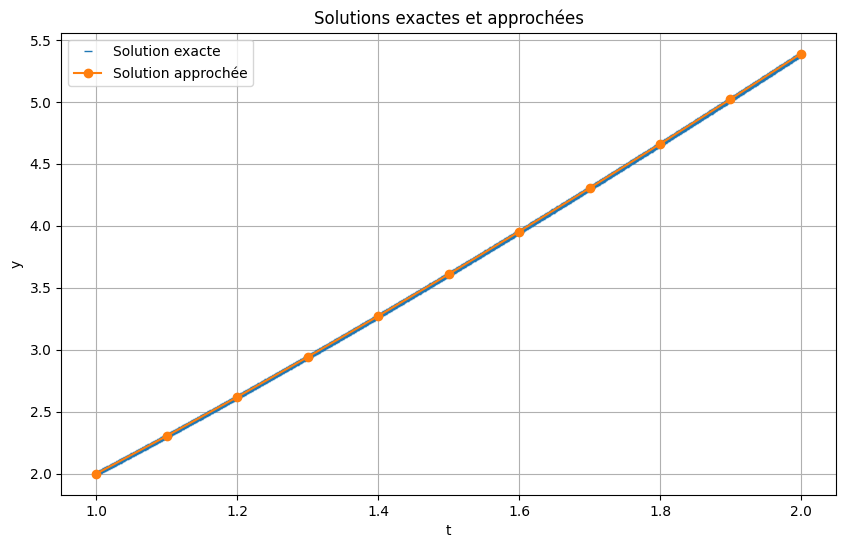

In [6]:
import matplotlib.pyplot as plt

# Exact solution
t_exact = np.linspace(a, b, 1000)
y_exact = exact_solution(t_exact)

# Approximate solution
t_approx, w_approx = adams_bashforth(f, a, b, N, alpha)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t_exact, y_exact,'_', label='Solution exacte')
plt.plot(t_approx, w_approx, 'o-', label='Solution approchée')
plt.xlabel('t')
plt.ylabel('y')
plt.title('Solutions exactes et approchées')
plt.legend()
plt.grid(True)
plt.show()

4) Calculer les erreurs E(i) = |w(i) −y(i)|.

In [7]:
# Calculate the exact solution at the same points as the approximate solution
y_exact = exact_solution(t_approx)

# Calculate the errors
E = np.abs(w_approx - y_exact)

# Print the errors
for i in range(N + 1):
    print(f'E{i} = {E[i]}')

E0 = 0.0
E1 = 2.715152600529791e-07
E2 = 0.00035154806259241056
E3 = 0.0006905527859029092
E4 = 0.0010065584860328158
E5 = 0.0013039356928317147
E6 = 0.001586390498989676
E7 = 0.001856719054114997
E8 = 0.0021170586817698123
E9 = 0.002369071133113465
E10 = 0.002614068167482664


5) Tracer l’erreur en fonction du temps, sur un autre graphique.

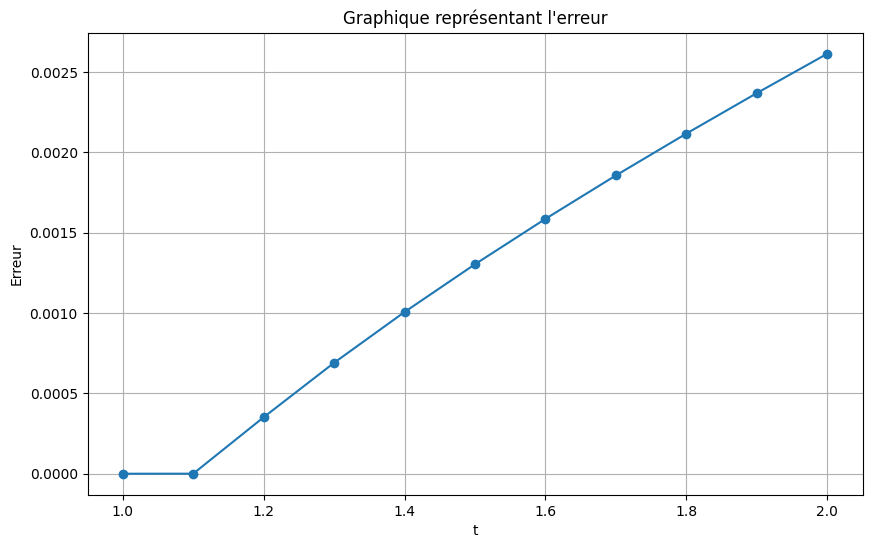

In [8]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(t_approx, E, 'o-')
plt.xlabel('t')
plt.ylabel('Erreur')
plt.title('Graphique représentant l\'erreur')
plt.grid(True)
plt.show()

6) En renouvelant les questions 2) à 5) avec N=20; N=40, puis N=80, en d ́eduire l’ordre de pr ́ecision
du schéma.

In [9]:
# List of N values
N_values = [10, 20, 40, 80]

# List to store the maximum errors
max_errors = []

for N in N_values:
    # Approximate solution
    t_approx, w_approx = adams_bashforth(f, a, b, N, alpha)

    # Exact solution
    y_exact = exact_solution(t_approx)

    # Errors
    E = np.abs(w_approx - y_exact)

    # Maximum error
    max_error = np.max(E)
    max_errors.append(max_error)

# Calculate the order of precision
order_of_precision = np.log(max_errors[0] / max_errors[1]) / np.log(N_values[1] / N_values[0])

order_of_precision

1.8692827893962225